## Importa bibliotecas

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Carrega dados

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()



## Explora dados

In [3]:
imagens_treino.shape

(60000, 28, 28)

In [4]:
imagens_teste.shape

(10000, 28, 28)

In [5]:
identificacoes_treino.shape

(60000,)

In [6]:
identificacoes_teste.shape

(10000,)

## Exibe dados

Text(0.5, 1.0, '9')

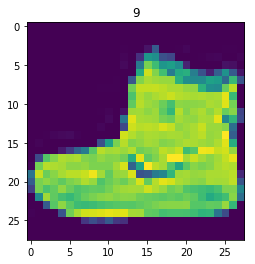

In [17]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [19]:
identificacoes_treino.min()

0

In [20]:
identificacoes_treino.max()

9

In [7]:
total_de_classificacoes = 10

In [8]:
nomes_classificacoes = ['Camiseta', 'Calça', 
                        'Pullover', 'Vestido',
                        'Casaco', 'Sandalia',
                        'Camisa', 'Tenis', 'Bolsa',
                        'Bota']


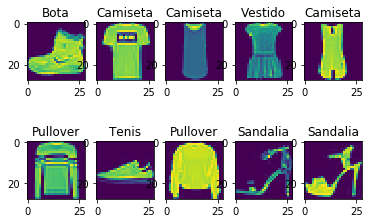

In [9]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_classificacoes[identificacoes_treino[imagem]])

## Cria modelo

In [34]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # saida
])

In [38]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy') # entropia categorica cruzada esparsa


In [39]:
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 2s 1ms/step - loss: 3.9570


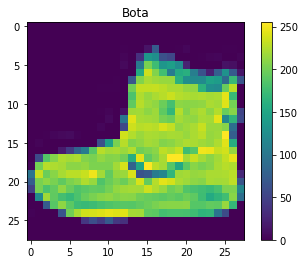

In [41]:
plt.imshow(imagens_treino[0])
plt.title(nomes_classificacoes[identificacoes_treino[0]])
plt.colorbar()

## Transforma dados

In [42]:
imagens_treino = imagens_treino/float(255) # normalização

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy') # entropia categorica cruzada esparsa

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4828


In [44]:
imagens_treino = imagens_treino/float(255) # normalização

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy') # entropia categorica cruzada esparsa

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.7966


In [45]:
imagens_treino = imagens_treino/float(255) # normalização

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy') # entropia categorica cruzada esparsa

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028


In [25]:
imagens_treino = imagens_treino/float(255) # normalização

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), # processamento
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) # saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', # entropia categorica cruzada esparsa
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1003
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy:

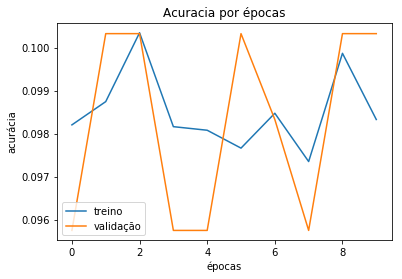

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

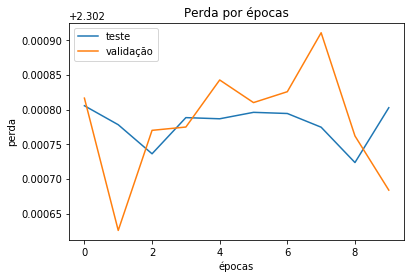

In [28]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['teste', 'validação'])

In [4]:
testes = modelo.predict(imagens_teste)

In [5]:
print(f'resultado do teste {np.argmax(testes[0])}')
print(f'numero da imagem de teste: {identificacoes_teste[0]}')

resultado do teste 9
numero da imagem de teste: 9


In [8]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print(f'perda do teste {perda_teste}, acuracia do teste {acuracia_teste}')

313/313 [==============================] - 0s 783us/step - loss: 56.1323 - accuracy: 0.8652
perda do teste 56.132301330566406, acuracia do teste 0.8651999831199646
